In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import math as m

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dataset_url = '/content/gdrive/My Drive/case_studies/UT_Data_Complex/new_df.csv'
data = pd.read_csv(dataset_url)


In [4]:
data.head()

,Unnamed: 0,acc_X,acc_Y,acc_Z,linearacc_X,linearacc_Y,linearacc_Z,gyro_X,gyro_Y,gyro_Z,mag_X,mag_Y,mag_Z,labels,Activity_Name,velx,vely,velz,distx,disty,distz,mag_vel,mag_dist,mag_acc,mag_lacc,mag_gyro,mag_magnet,jerkx,jerky,jerkz,mag_jerk,gjerkx,gjerky,gjerkz,mag_gjerk
0,0,-5.924900,-10.978,1.00790,-5.3538,-1.2218,1.82100,-3.6328,-0.64599,-0.56016,21.12,42.60,15.78,11111,walk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.515462,5.785500,3.732066,50.098132,-51.75500,200.90000,-398.39500,449.174761,33.855,-115.4855,-119.7770,169.792790
1,1,-6.960000,-12.136,0.28603,-5.4353,-2.4642,0.84062,-2.9557,-0.34147,-0.60598,20.82,42.60,16.74,11111,walk,-0.107076,-0.024436,0.036420,-0.001071,-0.000244,0.000364,0.115710,0.001157,13.993066,6.026725,3.036441,50.283795,149.82500,408.62500,-212.47650,484.322397,49.070,-81.6415,-68.4160,117.277229
2,2,-3.963500,-15.568,-3.37780,-2.3250,-5.9283,-2.62940,-1.9743,-2.27580,-0.76908,20.64,42.36,17.34,11111,walk,-0.215782,-0.073720,0.053232,-0.001108,-0.000498,0.000175,0.234158,0.001228,16.415891,6.889420,3.109439,50.210107,195.45095,775.67595,166.16595,816.997782,-38.225,-23.1500,-98.4860,108.150660
3,3,-0.054481,-15.677,-4.44020,1.2882,-6.0468,-3.16490,-2.7388,-3.08000,-0.89247,20.40,42.06,18.36,11111,walk,-0.262282,-0.192286,0.000644,-0.000487,-0.001196,-0.000522,0.325217,0.001393,16.293762,6.945491,4.217099,50.222437,20.43055,801.55650,239.71650,836.883642,-0.155,16.9050,-92.4715,94.004156
4,4,0.354130,-13.048,-2.57420,1.5373,-3.4059,-1.23460,-2.7419,-0.46853,-0.94287,20.34,42.06,19.02,11111,walk,-0.236518,-0.313222,-0.062654,0.000248,-0.001233,-0.000643,0.397460,0.001413,13.304218,3.935439,2.937097,50.443231,-28.60300,641.50350,117.81350,652.859015,36.500,-77.1685,-53.4515,100.718867


In [0]:
data.drop('Unnamed: 0', 1, inplace=True)

In [6]:
data.head(2)

,acc_X,acc_Y,acc_Z,linearacc_X,linearacc_Y,linearacc_Z,gyro_X,gyro_Y,gyro_Z,mag_X,mag_Y,mag_Z,labels,Activity_Name,velx,vely,velz,distx,disty,distz,mag_vel,mag_dist,mag_acc,mag_lacc,mag_gyro,mag_magnet,jerkx,jerky,jerkz,mag_jerk,gjerkx,gjerky,gjerkz,mag_gjerk
0,-5.9249,-10.978,1.00790,-5.3538,-1.2218,1.82100,-3.6328,-0.64599,-0.56016,21.12,42.6,15.78,11111,walk,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,12.515462,5.785500,3.732066,50.098132,-51.755,200.900,-398.3950,449.174761,33.855,-115.4855,-119.777,169.792790
1,-6.9600,-12.136,0.28603,-5.4353,-2.4642,0.84062,-2.9557,-0.34147,-0.60598,20.82,42.6,16.74,11111,walk,-0.107076,-0.024436,0.03642,-0.001071,-0.000244,0.000364,0.11571,0.001157,13.993066,6.026725,3.036441,50.283795,149.825,408.625,-212.4765,484.322397,49.070,-81.6415,-68.416,117.277229


## Train Test Split

In [0]:
y = data['labels'].values
X = data.drop(['Activity_Name', 'labels'], 1)

In [10]:
X.head()

,acc_X,acc_Y,acc_Z,linearacc_X,linearacc_Y,linearacc_Z,gyro_X,gyro_Y,gyro_Z,mag_X,mag_Y,mag_Z,velx,vely,velz,distx,disty,distz,mag_vel,mag_dist,mag_acc,mag_lacc,mag_gyro,mag_magnet,jerkx,jerky,jerkz,mag_jerk,gjerkx,gjerky,gjerkz,mag_gjerk
0,-5.924900,-10.978,1.00790,-5.3538,-1.2218,1.82100,-3.6328,-0.64599,-0.56016,21.12,42.60,15.78,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.515462,5.785500,3.732066,50.098132,-51.75500,200.90000,-398.39500,449.174761,33.855,-115.4855,-119.7770,169.792790
1,-6.960000,-12.136,0.28603,-5.4353,-2.4642,0.84062,-2.9557,-0.34147,-0.60598,20.82,42.60,16.74,-0.107076,-0.024436,0.036420,-0.001071,-0.000244,0.000364,0.115710,0.001157,13.993066,6.026725,3.036441,50.283795,149.82500,408.62500,-212.47650,484.322397,49.070,-81.6415,-68.4160,117.277229
2,-3.963500,-15.568,-3.37780,-2.3250,-5.9283,-2.62940,-1.9743,-2.27580,-0.76908,20.64,42.36,17.34,-0.215782,-0.073720,0.053232,-0.001108,-0.000498,0.000175,0.234158,0.001228,16.415891,6.889420,3.109439,50.210107,195.45095,775.67595,166.16595,816.997782,-38.225,-23.1500,-98.4860,108.150660
3,-0.054481,-15.677,-4.44020,1.2882,-6.0468,-3.16490,-2.7388,-3.08000,-0.89247,20.40,42.06,18.36,-0.262282,-0.192286,0.000644,-0.000487,-0.001196,-0.000522,0.325217,0.001393,16.293762,6.945491,4.217099,50.222437,20.43055,801.55650,239.71650,836.883642,-0.155,16.9050,-92.4715,94.004156
4,0.354130,-13.048,-2.57420,1.5373,-3.4059,-1.23460,-2.7419,-0.46853,-0.94287,20.34,42.06,19.02,-0.236518,-0.313222,-0.062654,0.000248,-0.001233,-0.000643,0.397460,0.001413,13.304218,3.935439,2.937097,50.443231,-28.60300,641.50350,117.81350,652.859015,36.500,-77.1685,-53.4515,100.718867


In [7]:
len(data)

1169999

In [0]:
XT_train, XT_test, yT_train, yT_test = train_test_split(X, y, test_size=0.1, stratify=y)


In [15]:
print('X_train and y_train : ({},{})'.format(XT_train.shape, yT_train.shape))
print('X_test  and y_test  : ({},{})'.format(XT_test.shape, yT_test.shape))

X_train and y_train : ((1052999, 32),(1052999,))
X_test  and y_test  : ((117000, 32),(117000,))


In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XT_test, yT_test, test_size=0.33, stratify=yT_test)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)    

In [19]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((78390, 32),(78390,))
X_test  and y_test  : ((38610, 32),(38610,))


# Modelling

In [0]:
#X_train['Activity_Name'].value_counts()

In [0]:
#labels=['walk', 'stand','jog','sit','bike', 'upstairs', 'downstairs', 'type', 'write', 'coffee', 'talk', 'smoke', 'eat']

In [0]:
labels = data['labels'].unique()

In [29]:
labels

array([11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119,
       11120, 11121, 11122, 11123])

## Function to print Confusion Matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

In [0]:
#labels = data['Activity_Name'].unique()

In [24]:
data.columns

Index(['acc_X', 'acc_Y', 'acc_Z', 'linearacc_X', 'linearacc_Y', 'linearacc_Z',
       'gyro_X', 'gyro_Y', 'gyro_Z', 'mag_X', 'mag_Y', 'mag_Z', 'labels',
       'Activity_Name', 'velx', 'vely', 'velz', 'distx', 'disty', 'distz',
       'mag_vel', 'mag_dist', 'mag_acc', 'mag_lacc', 'mag_gyro', 'mag_magnet',
       'jerkx', 'jerky', 'jerkz', 'mag_jerk', 'gjerkx', 'gjerky', 'gjerkz',
       'mag_gjerk'],
      dtype='object')

### Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# Random Forests

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [0]:
feature_names = X_train.columns

In [0]:
labels = data['Activity_Name'].unique()

In [38]:
labels

array(['walk', 'stand', 'jog', 'sit', 'bike', 'upstairs', 'downstairs',
       'type', 'write', 'coffee', 'talk', 'smoke', 'eat'], dtype=object)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:37:39.971188


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.371660


---------------------
|      Accuracy      |
---------------------

    0.9977466977466978


--------------------
| Confusion Matrix |
--------------------

 [[2969    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0 2942    0    0    0    0    0    0    0    0   28    0    0]
 [   0    0 2970    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2968    0    0    0    0    0    2    0    0    0]
 [   0    0    0    0 2967    3    0    0    0    0    0    0    0]
 [   0    0    0    0    9 2960    1    0    0    0    0    0    0]
 [   0    0    0    0    2    0 2968    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2948   18    4    0    0    0]
 [   0    0    0    0    0    0    0    7 2963    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 2969    0    0    1]
 [   0   10

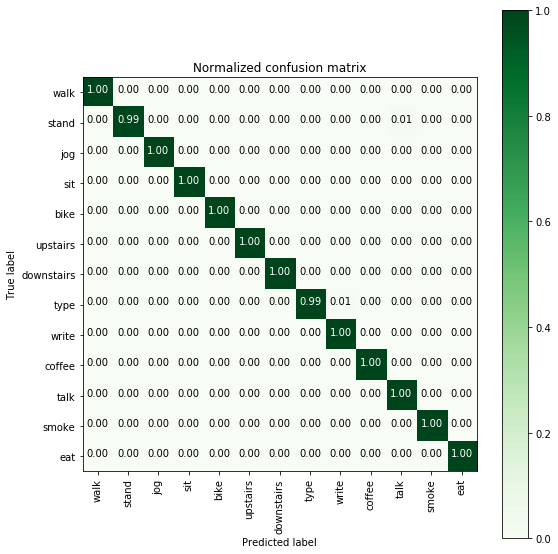

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

       11111       1.00      1.00      1.00      2970
       11112       1.00      0.99      0.99      2970
       11113       1.00      1.00      1.00      2970
       11114       1.00      1.00      1.00      2970
       11115       1.00      1.00      1.00      2970
       11116       1.00      1.00      1.00      2970
       11117       1.00      1.00      1.00      2970
       11118       1.00      0.99      1.00      2970
       11119       0.99      1.00      1.00      2970
       11120       1.00      1.00      1.00      2970
       11121       0.99      1.00      0.99      2970
       11122       1.00      1.00      1.00      2970
       11123       1.00      1.00      1.00      2970

    accuracy                           1.00     38610
   macro avg       1.00      1.00      1.00     38610
weighted avg       1.00      1.00      1.00     38610

--

In [39]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

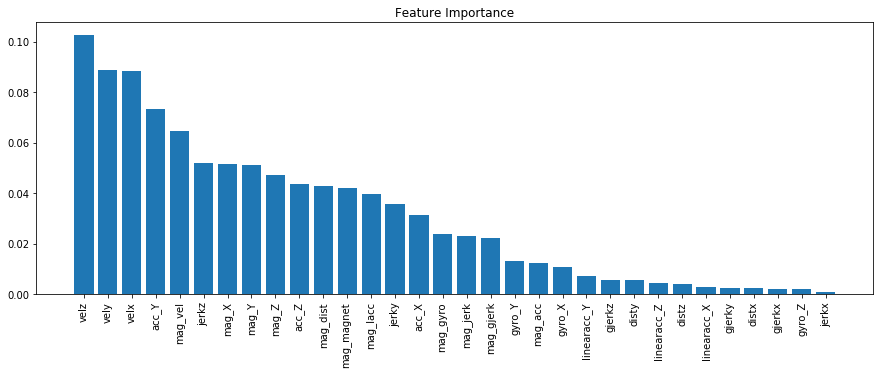

In [40]:
clf = RandomForestClassifier(n_estimators = 170, max_depth = 13, random_state=0, n_jobs=-1)
model = clf.fit(X_train, y_train)
importances = model.feature_importances_


indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(15,5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Conclusions

In [46]:
# Please compare all your models using Prettytable library

# Please compare all your models using Prettytable library

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "HyperParameter_1(n_estimators)", "HyperParameter_2(max_depth)", "Accuracy"]
                 
x.add_row(["RandomForest", 170, 13, 0.9977])


                 
print(x)

+--------------+--------------------------------+-----------------------------+----------+
|    Model     | HyperParameter_1(n_estimators) | HyperParameter_2(max_depth) | Accuracy |
+--------------+--------------------------------+-----------------------------+----------+
| RandomForest |              170               |              13             |  0.9977  |
+--------------+--------------------------------+-----------------------------+----------+


In [47]:
len(data)

1169999

## How i approached this problem ?

- there are 1169999 data points in the dataset
- 10 healthy participants aged 25-35
-<font color='blue'> Seven activities were performed by all ten participants </font> which are <font color='red'>walking, jogging, biking, walking upstairs, walking downstairs, sitting and standing</font>. 
- These activities were performed for <font color='red'>3 min</font> by each participant
-  <font color='blue'>Seven out of these ten participants</font> performed <font color='red'> eating, typing, writing, drinking coffee and giving a talk. </font>
- These activities were performed for <font color='red'>5–6 min. </font> Smoking was performed by six out of these ten participants, where each of them smoked one cigarette. Only six participants were smokers among the ten participants.
- We used 30 min of data for each activity with an equal amount of data from each participant. This
resulted in a dataset of 390 (13 × 30) min.
- so according to the above data, i divided 1169999 datapoints by 390 minutes which gives 0.02 seconds. so this is the calculated time which we have used in featurization.
- i performed eda, then featurization and the modelling as shown in the ipynb.
